In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('eda_data.csv')
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Age,Python_yn,R_yn,Spark_yn,Aws_yn,Excel_yn,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,...,51.0,1,0,0,0,1,data scientist,na,2555,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,...,40.0,1,0,0,0,0,data scientist,na,4828,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,...,14.0,1,0,1,0,1,data scientist,na,3495,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,...,59.0,1,0,0,0,0,data scientist,na,3926,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,...,26.0,1,0,0,0,1,data scientist,na,2748,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830.0,...,194.0,0,0,0,1,0,na,senior,6219,3
738,738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006.0,...,18.0,1,0,1,1,0,data engineer,senior,6167,3
739,739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984.0,...,40.0,0,0,0,0,1,na,na,3107,0
740,740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,NaN,...,NaN,0,0,0,0,1,manager,na,1678,0


In [29]:
# Choose relevant Columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Txt', 'Job State', 'Same State', 'Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [30]:
df.fillna(-1, inplace=True)


In [31]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp'
            ,'hourly','employer_provided','Job State','Same State','Age', 'Python_yn', 'R_yn',
       'Spark_yn', 'Aws_yn', 'Excel_yn', 'job_simp','seniority','desc_len']]

In [32]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_salary         742 non-null    float64
 1   Rating             742 non-null    float64
 2   Size               742 non-null    object 
 3   Type of ownership  742 non-null    object 
 4   Industry           742 non-null    object 
 5   Sector             742 non-null    object 
 6   Revenue            742 non-null    object 
 7   num_comp           742 non-null    int64  
 8   hourly             742 non-null    int64  
 9   employer_provided  742 non-null    int64  
 10  Job State          742 non-null    object 
 11  Same State         742 non-null    int64  
 12  Age                742 non-null    float64
 13  Python_yn          742 non-null    int64  
 14  R_yn               742 non-null    int64  
 15  Spark_yn           742 non-null    int64  
 16  Aws_yn             742 non

In [33]:
# Get Dummy Data
df_dum = pd.get_dummies(df_model)
df_dum

,avg_salary,Rating,num_comp,hourly,employer_provided,Same State,Age,Python_yn,R_yn,Spark_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,51.0,1,0,0,...,False,False,True,False,False,False,False,False,True,False
1,87.5,3.4,0,0,0,0,40.0,1,0,0,...,False,False,True,False,False,False,False,False,True,False
2,85.0,4.8,0,0,0,1,14.0,1,0,1,...,False,False,True,False,False,False,False,False,True,False
3,76.5,3.8,3,0,0,1,59.0,1,0,0,...,False,False,True,False,False,False,False,False,True,False
4,114.5,2.9,3,0,0,1,26.0,1,0,0,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,194.0,0,0,0,...,False,False,False,False,False,False,True,False,False,True
738,102.5,4.4,3,0,0,0,18.0,1,0,1,...,False,True,False,False,False,False,False,False,False,True
739,73.5,2.6,0,0,0,1,40.0,0,0,0,...,False,False,False,False,False,False,True,False,True,False
740,127.5,3.2,0,0,0,0,-1.0,0,0,0,...,False,False,False,False,True,False,False,False,True,False


In [34]:
df_dum.isna().sum()

avg_salary           0
Rating               0
num_comp             0
hourly               0
employer_provided    0
                    ..
job_simp_mle         0
job_simp_na          0
seniority_jr         0
seniority_na         0
seniority_senior     0
Length: 179, dtype: int64

In [35]:
# Train & Test Split
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis=1)
y = pd.to_numeric(df_dum['avg_salary'], errors='coerce').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)



In [36]:
import statsmodels.api as sm

X_sm = sm.add_constant(X).astype(float)
model = sm.OLS(y, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.13
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           4.29e-94
Time:                        21:07:04   Log-Likelihood:                -3311.5
No. Observations:                 742   AIC:                             6911.
Df Residuals:                     598   BIC:                             7575.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [37]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-342177625.57029146

,alpha,error
12,0.13,-19.263942


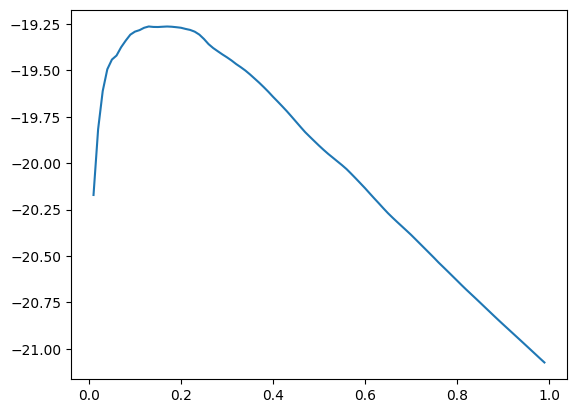

In [39]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

rf = RandomForestRegressor()

cv_score = np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))
print("Cross-Validation MAE:", cv_score)

parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ('squared_error', 'absolute_error'),  # Use the correct criterion values
    'max_features': ('auto', 'sqrt', 'log2')
}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

print("Best Score:", gs.best_score_)
print("Best Estimator:", gs.best_estimator_)


In [43]:
rf = RandomForestRegressor(
    ccp_alpha=0.0,
    bootstrap=True,
    criterion='absolute_error',  
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=170,
    oob_score=False
)

rf.fit(X_train, y_train)

e:\tmp\python\ml\qenv\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=170)

In [45]:
train_score = rf.score(X_train, y_train)
print("Training R^2 Score:", train_score)

Training R^2 Score: 0.9599668964903053


In [48]:
from sklearn.metrics import mean_absolute_error

mae_lm = mean_absolute_error(y_test, tpred_lm)
mae_lml = mean_absolute_error(y_test, tpred_lml)
mae_rf = mean_absolute_error(y_test, tpred_rf)

mae_ensemble = mean_absolute_error(y_test, (tpred_lm + tpred_rf) / 2)

print("Mean Absolute Error for Linear Model (lm):", mae_lm)
print("Mean Absolute Error for Lasso Model (lm_l):", mae_lml)
print("Mean Absolute Error for Random Forest Model (rf):", mae_rf)
print("Mean Absolute Error for Ensemble (lm + rf):", mae_ensemble)


Mean Absolute Error for Linear Model (lm): 60985729.63932743
Mean Absolute Error for Lasso Model (lm_l): 19.665385533567584
Mean Absolute Error for Random Forest Model (rf): 11.246535728385313
Mean Absolute Error for Ensemble (lm + rf): 30492869.752061743


In [50]:
import pickle
pickl = {'model': rf}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

e:\tmp\python\ml\qenv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[3.6,
 0,
 0,
 0,
 1,
 38.0,
 0,
 0,
 0,
 0,
 1,
 4644,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals